## 24W-COM SCI-M148 Project 2 - Binary Classification Comparative Methods

Name: Jacob Sayono

UID: 505368811

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions

In [1]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [2]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [3]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal   sick  
0   0     1  False  
1   0     2  False  
2   0     2  False  
3   0     2  False  
4   0     2  False  


In [4]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB
None


### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [6]:
data['sick'] = data['sick'].astype(int)

### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient?

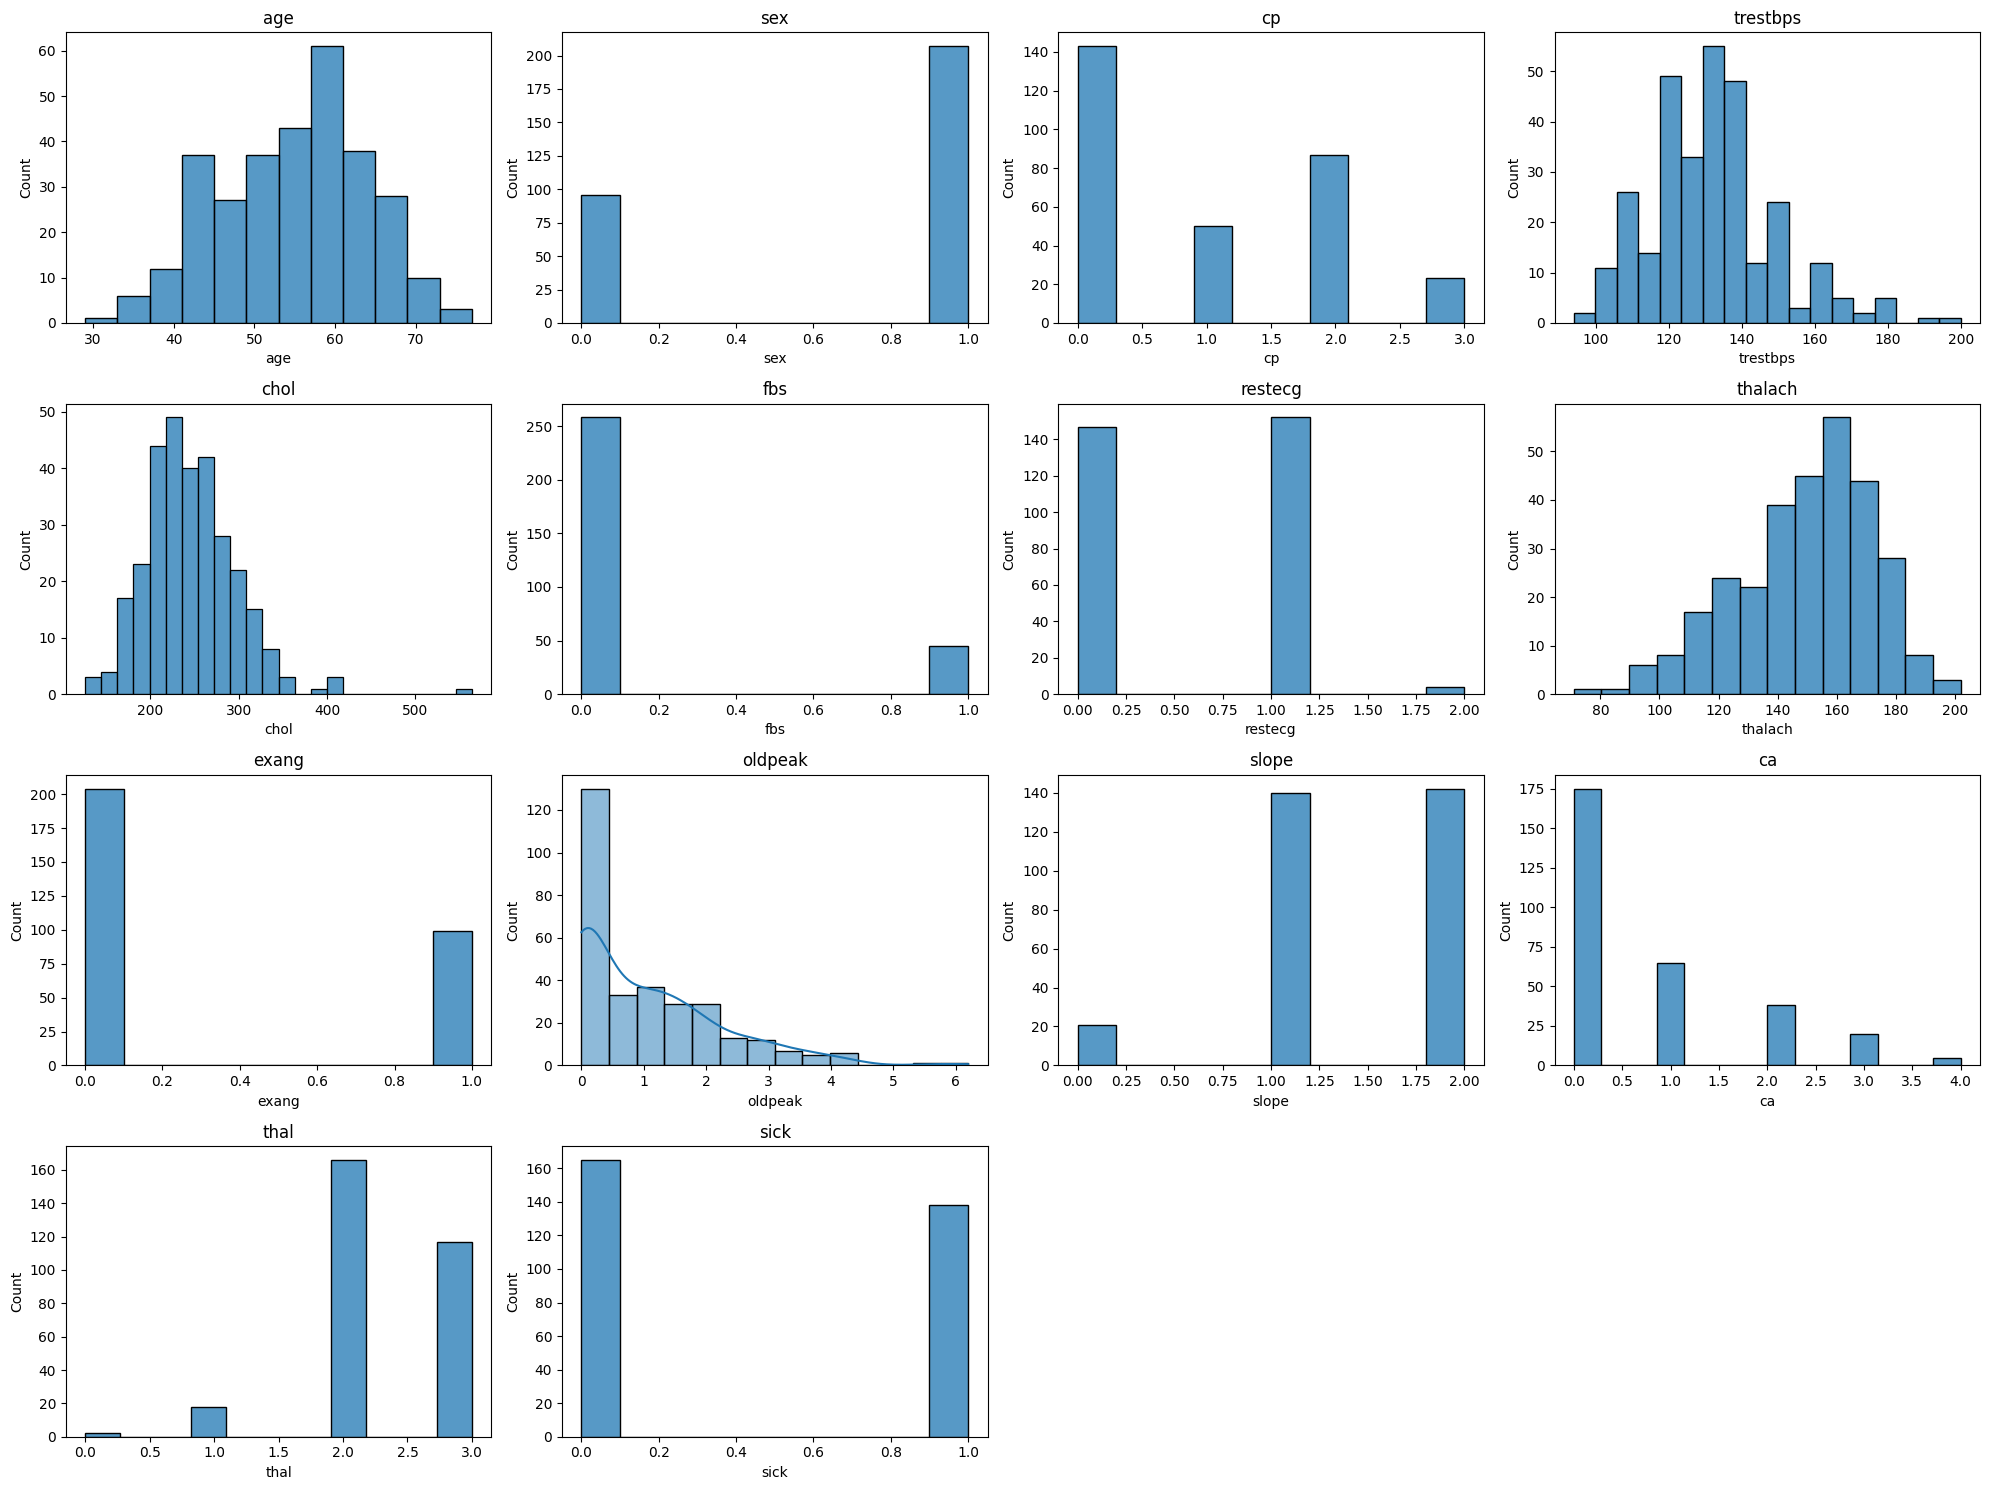

In [7]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[column], kde=(data[column].dtype == 'float64'))
    plt.title(column)
plt.tight_layout()
plt.show()

**Binary Variables:**

- `sex`, `fbs`, and `exang` are binary, as their histograms show two distinct bars representing the two possible values (0 and 1).

**Limited Selection Variables:**

- `cp` shows four bars, indicating it's a categorical variable with four categories (chest pain types).
- `restecg` has three bars, representing three categories of electrocardiographic results.
- `slope` displays three distinct bars, indicating three categories for the slope of the peak exercise ST segment.
- `ca` and `thal` also exhibit a limited number of bars, corresponding to their categorical nature.

**Gradient Variables:**

- `age` shows a relatively smooth distribution, indicating it's a continuous variable.
- `trestbps`, `chol`, `thalach`, and `oldpeak` display a range of values with distributions that suggest they are continuous variables, following a gradient of values.

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results:

sick
0    165
1    138
Name: count, dtype: int64


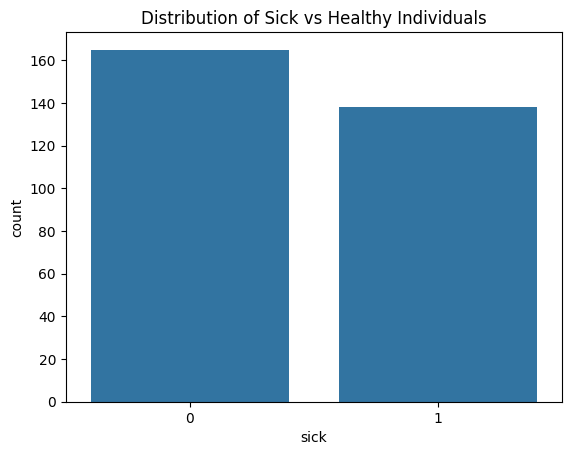

In [8]:
print(data['sick'].value_counts())

sns.countplot(x='sick', data=data)
plt.title('Distribution of Sick vs Healthy Individuals')
plt.show()

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

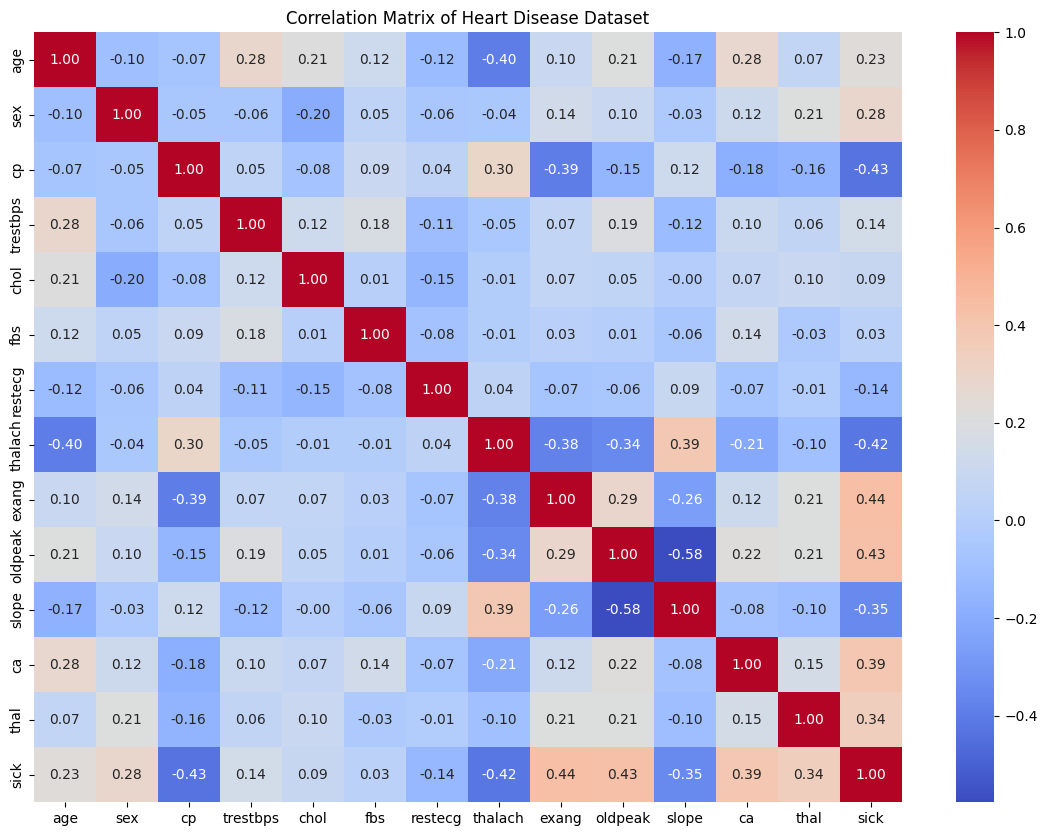

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

In analyzing the correlations within the heart disease dataset, we observe that certain variables such as chest pain type (`cp`) and maximum heart rate achieved (`thalach`) exhibit strong positive correlations with the presence of heart disease, suggesting their significant predictive value. This aligns with medical insights that specific chest pain types and higher exercise capacity are closely linked to cardiovascular health. Conversely, other variables like `sex` and `age` show weaker correlations, indicating a less direct impact on heart disease prediction, although they remain relevant due to their association with broader demographic and biological influences on heart health. Variables demonstrating negative correlations may indicate protective factors or less direct relationships with heart disease. The observed correlations reflect a combination of direct biological mechanisms and more complex health interactions, highlighting the importance of a multifaceted approach in understanding and predicting heart disease risk.

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe.

In [10]:
labels = data['sick'].values
features = data.drop('sick', axis=1)

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212, 13) (91, 13) (212,) (91,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [13]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6593406593406593


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

Hint:
1. Create separate pipelines for numeric and categorical features with Pipeline() and then combining them with ColumnTransformer()
2. First, fit the full pipeline with the training data. Then, apply it to the test data as well.

### Pipeline:

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [16]:
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object', 'bool']).columns

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [17]:
# Pipeline my test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Now retrain your model and compare the accuracy metrics (Accuracy, Precision, Recall, F1 Score) with the raw and pipelined data.

In [18]:
# k-Nearest Neighbors algorithm
knn.fit(X_train_processed, y_train)
y_pred_processed = knn.predict(X_test_processed)

In [19]:
accuracy_proc = accuracy_score(y_test, y_pred_processed)
precision_proc = precision_score(y_test, y_pred_processed)
recall_proc = recall_score(y_test, y_pred_processed)
f1_proc = f1_score(y_test, y_pred_processed)

print(f"Processed Data - Accuracy: {accuracy_proc}, Precision: {precision_proc}, Recall: {recall_proc}, F1 Score: {f1_proc}")

Processed Data - Accuracy: 0.8681318681318682, Precision: 0.8536585365853658, Recall: 0.8536585365853658, F1 Score: 0.8536585365853658


After retraining our model with both the raw and pipelined data, we can observe a significant improvement in the accuracy metrics when using the processed data. I believe that the preprocessing steps, particularly feature scaling and categorical encoding, likely contributed to a more effective learning process for the K-Nearest Neighbors algorithm. Scaling ensured that all features contributed equally to the model by normalizing their ranges, while encoding transformed categorical variables into a format that could be efficiently used for distance calculation. The enhancements in precision, recall, and F1 score further may suggest that the model with processed data not only predicts more accurately but also balances the rate of false positives and false negatives more effectively. This comparison shows me the importance of how such steps can significantly impact model performance, especially for algorithms sensitive to the scale of input features like KNN.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [20]:
n_neighbors_options = [1, 2, 3, 5, 7, 9, 10, 20, 50]

accuracy_scores = {}

for n_neighbors in n_neighbors_options:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_processed, y_train)
    y_pred = knn.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[n_neighbors] = accuracy

for n_neighbors, accuracy in accuracy_scores.items():
    print(f"n_neighbors: {n_neighbors}, Accuracy: {accuracy}")

n_neighbors: 1, Accuracy: 0.7802197802197802
n_neighbors: 2, Accuracy: 0.7692307692307693
n_neighbors: 3, Accuracy: 0.8351648351648352
n_neighbors: 5, Accuracy: 0.8681318681318682
n_neighbors: 7, Accuracy: 0.8681318681318682
n_neighbors: 9, Accuracy: 0.8351648351648352
n_neighbors: 10, Accuracy: 0.8351648351648352
n_neighbors: 20, Accuracy: 0.8461538461538461
n_neighbors: 50, Accuracy: 0.8351648351648352


## Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.

### Report metrics for:
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_processed, y_train)
y_pred_log_reg = log_reg.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Logistic Regression - Accuracy: 0.8131868131868132, Precision: 0.8, Recall: 0.7804878048780488, F1 Score: 0.7901234567901235


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

- **Accuracy** measures the proportion of true results (both true positives and true negatives) in the total data set. It's a general measure of how often the classifier is correct.
- **Precision** measures the proportion of true positive results in the set of all samples that were labeled as positive. It's crucial when the cost of false positives is high.
- **Recall** (or sensitivity) measures the proportion of true positive results in the set of all samples that should have been identified as positive. It's essential when the cost of false negatives is high, such as in medical diagnosis.
- **F1 Score** is the harmonic mean of precision and recall, providing a balance between them. It's useful when you need a single metric to compare two models, especially when there's an uneven class distribution.

Different scenarios require prioritizing one metric over others. For example, in spam detection (where missing a spam email is preferable to incorrectly marking an important email as spam), precision might be valued over recall. On the other hand, in disease screening, recall might be more critical than precision to ensure all potential cases are identified for further testing.


### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
log_reg_modified = LogisticRegression(solver='sag', max_iter=10, penalty='none')
log_reg_modified.fit(X_train_processed, y_train)
y_pred_log_reg_mod = log_reg_modified.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred_log_reg_mod)
precision = precision_score(y_test, y_pred_log_reg_mod)
recall = recall_score(y_test, y_pred_log_reg_mod)
f1 = f1_score(y_test, y_pred_log_reg_mod)

print(f"Logistic Regression (w/ Modified Settings) - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Logistic Regression (w/ Modified Settings) - Accuracy: 0.8021978021978022, Precision: 0.7804878048780488, Recall: 0.7804878048780488, F1 Score: 0.7804878048780488


/home/jacobsayono/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
log_reg_fix = LogisticRegression(solver='sag', max_iter=10000, penalty='none')
log_reg_fix.fit(X_train_processed, y_train)
y_pred_log_reg_fix = log_reg_fix.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred_log_reg_fix)
precision = precision_score(y_test, y_pred_log_reg_fix)
recall = recall_score(y_test, y_pred_log_reg_fix)
f1 = f1_score(y_test, y_pred_log_reg_fix)

print(f"Logistic Regression (w/ Modified Settings & Convergence Warning Fix) - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Logistic Regression (w/ Modified Settings & Convergence Warning Fix) - Accuracy: 0.8021978021978022, Precision: 0.7804878048780488, Recall: 0.7804878048780488, F1 Score: 0.7804878048780488


### Explain what you changed, and why do you think that may have altered the outcome.

By increasing max_iter and changing the solver or introducing regularization, we allow the algorithm more iterations to converge to a solution, potentially leading to a more accurate model. The choice of solver impacts how the optimization problem is solved. For example, sag and saga are faster on large datasets but might require more iterations for convergence, especially with complex models or data.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train_processed, y_train)
y_pred_log_reg_l1 = log_reg_l1.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred_log_reg_l1)
precision = precision_score(y_test, y_pred_log_reg_l1)
recall = recall_score(y_test, y_pred_log_reg_l1)
f1 = f1_score(y_test, y_pred_log_reg_l1)

print(f"Logistic Regression (w/ L1 Penalty) - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Logistic Regression (w/ L1 Penalty) - Accuracy: 0.8241758241758241, Precision: 0.8048780487804879, Recall: 0.8048780487804879, F1 Score: 0.8048780487804877


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!).

- **Solver approaches:** `liblinear` is designed for small or medium-sized datasets and supports `l1` and `l2` penalty terms. It's good for problems with a simple decision boundary. `sag` (Stochastic Average Gradient descent) and `saga` are variations better suited for large datasets and support more types of regularization.
- **Improved outcome with `liblinear`:** This solver might produce an improved outcome due to its efficient handling of `l1` penalty, which can lead to sparser solutions and may be beneficial if feature selection is important. However, the performance can vary depending on the dataset's characteristics and the specific problem.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [38]:
# SVM
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_processed, y_train)
y_pred_svm = svm_clf.predict(X_test_processed)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using `from sklearn.metrics import ConfusionMatrixDisplay` for this one!


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"SVM Classifier - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

SVM Classifier - Accuracy: 0.8241758241758241, Precision: 0.8048780487804879, Recall: 0.8048780487804879, F1 Score: 0.8048780487804877


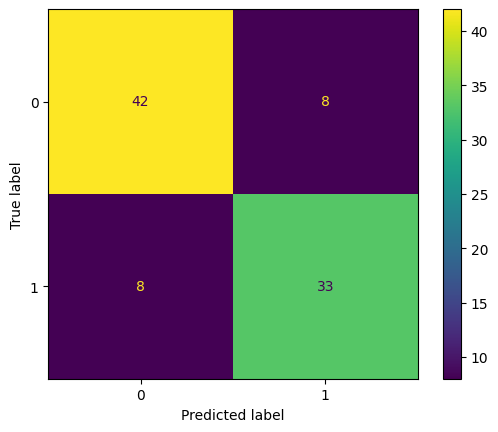

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

recommend using the `metrics.roc_curve` `metrics.auc` and `metrics.RocCurveDisplay` for this one!

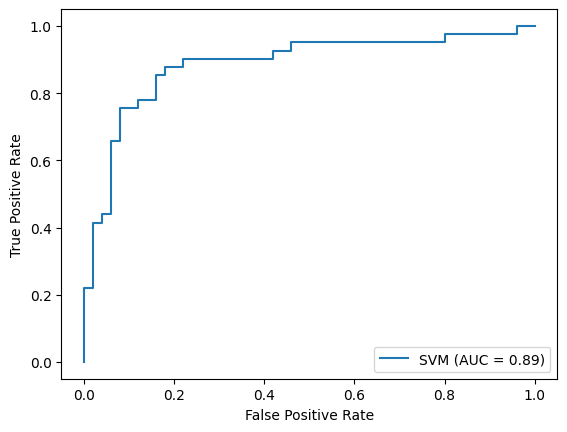

In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_pred_proba_svm = svm_clf.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM').plot()

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [42]:
# SVM
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_processed, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_processed)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_svm_linear)
precision = precision_score(y_test, y_pred_svm_linear)
recall = recall_score(y_test, y_pred_svm_linear)
f1 = f1_score(y_test, y_pred_svm_linear)

print(f"SVM Classifier (w/ Linear Kernel) - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

SVM Classifier (w/ Linear Kernel) - Accuracy: 0.8131868131868132, Precision: 0.8, Recall: 0.7804878048780488, F1 Score: 0.7901234567901235


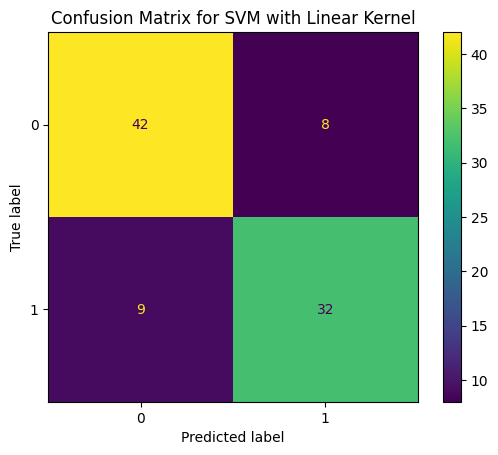

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_linear)
plt.title('Confusion Matrix for SVM with Linear Kernel')
plt.show()

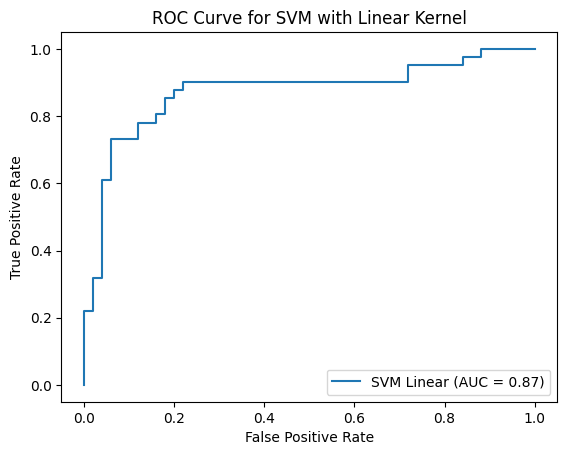

In [48]:
y_pred_proba_svm_linear = svm_linear.predict_proba(X_test_processed)[:, 1]
fpr_svm_linear, tpr_svm_linear, thresholds_svm_linear = roc_curve(y_test, y_pred_proba_svm_linear)
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

RocCurveDisplay(fpr=fpr_svm_linear, tpr=tpr_svm_linear, roc_auc=roc_auc_svm_linear, estimator_name='SVM Linear').plot()
plt.title('ROC Curve for SVM with Linear Kernel')
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

Changing the SVM kernel to `linear` impacts how the decision boundary is determined. A linear kernel attempts to separate the data with a straight line (or hyperplane in higher dimensions), which can lead to different model performance characteristics. If the data is linearly separable, this might result in better accuracy, precision, recall, and F1 scores because the model more accurately reflects the underlying distribution of the data. However, if the data is not linearly separable, performance might not improve or could even degrade compared to using a more complex kernel like `rbf`.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic Regression and Linear SVM both aim to find a linear decision boundary that separates the classes. However, their approaches differ in how they measure the error or loss to be minimized:

- **Logistic Regression** minimizes the logistic loss. It estimates probabilities using a logistic function, which is handy when you need the probability scores of observations.
- **Linear SVM** minimizes the hinge loss and aims to find the hyperplane that maximizes the margin between the classes. It's more focused on correctly separating as many instances as possible, rather than on the probabilistic interpretation of those separations.

# Printing Jupyter notebook to PDF

https://piazza.com/class/lr48piooit63hi/post/47 by Steven Bash

It may take a few minutes to run

In [ ]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
  if not pathlib.Path("/usr/local/bin/quarto").exists():
    !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()